In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json

import glob

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

left  = 0.05  # the left side of the subplots of the figure
right = 0.925    # the right side of the subplots of the figure
bottom = 0.15   # the bottom of the subplots of the figure
top = 0.85      # the top of the subplots of the figure
wspace = 0.25   # the amount of width reserved for blank space between subplots
hspace = 0.25   # the amount of height reserved for white space between subplots

## Read kinn and dae result files

In [2]:
kinn_05_file = 'results/0_5noise_kinn.xlsx'
kinn_10_file = 'results/1_0noise_kinn.xlsx'
kinn_20_file = 'results/2_0noise_kinn.xlsx'

dae_05_file = glob.glob('results/05_dae*.csv')
dae_10_file = glob.glob('results/10_dae*.csv')
dae_20_file = glob.glob('results/20_dae*.csv')

raw_05_file = glob.glob('results/05_raw*.csv')
raw_10_file = glob.glob('results/10_raw*.csv')
raw_20_file = glob.glob('results/20_raw*.csv')

f = open('../../data/TAP_thin_data.json')
thin_data = json.load(f)
f.close()
thin_data = json.loads(thin_data)['1']

In [3]:
kinn_05_conc = pd.read_excel(kinn_05_file, sheet_name = 0)
kinn_10_conc = pd.read_excel(kinn_10_file, sheet_name = 0)
kinn_20_conc = pd.read_excel(kinn_20_file, sheet_name = 0)

kinn_05_k = pd.read_excel(kinn_05_file, sheet_name = 1)
kinn_10_k = pd.read_excel(kinn_10_file, sheet_name = 1)
kinn_20_k = pd.read_excel(kinn_20_file, sheet_name = 1)

In [4]:
dae_05_smooth = pd.read_csv(dae_05_file[0], index_col = 0)
dae_05_unsmooth = pd.read_csv(dae_05_file[1], index_col = 0)
dae_05_raw = pd.read_csv(raw_05_file[1], index_col = 0)

dae_10_smooth = pd.read_csv(dae_10_file[0], index_col = 0)
dae_10_unsmooth = pd.read_csv(dae_10_file[1], index_col = 0)
dae_10_raw = pd.read_csv(raw_10_file[1], index_col = 0)

dae_20_smooth = pd.read_csv(dae_20_file[1], index_col = 0)
dae_20_unsmooth = pd.read_csv(dae_20_file[0], index_col = 0)
dae_20_raw = pd.read_csv(raw_20_file[0], index_col = 0)

## Figures generation

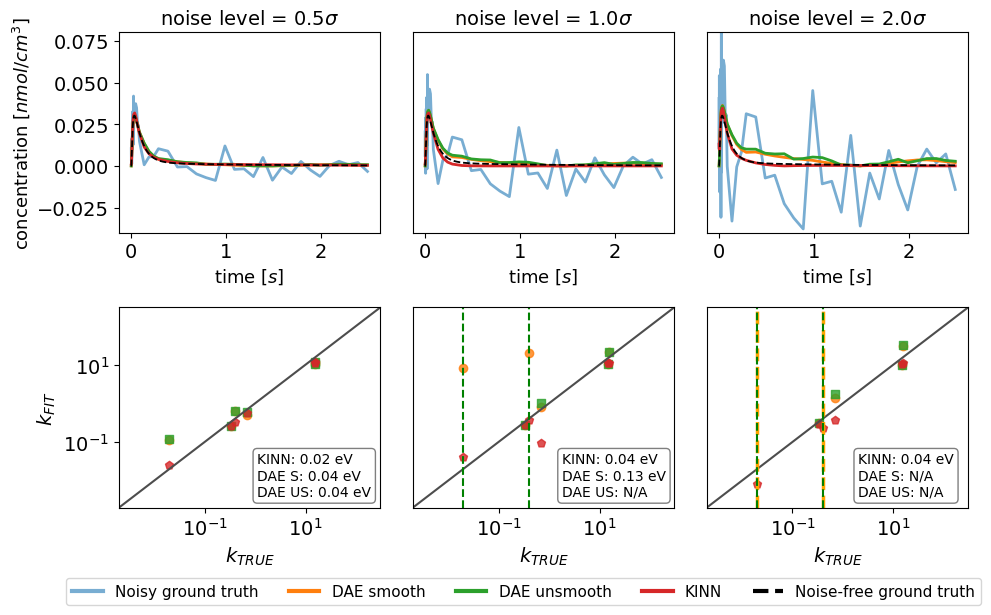

In [6]:
n_species = 0
n_pulse = 5
n_points = int(len(dae_05_raw.index) / n_pulse)
model_params_true = np.array([15, 0.7, 0.33, 0.4, 0.02, 15.2])


fig, axs = plt.subplots(2, 3, figsize = (10,6))


axs[0,0].plot(dae_05_raw.index[:n_points], dae_05_raw.iloc[:n_points,n_species], 
                          linewidth = 2, alpha = 0.6, label = 'Noisy ground truth')
axs[0,0].plot(dae_05_raw.index[:n_points], dae_05_smooth.iloc[:n_points,n_species], 
                         linewidth = 2, label = 'DAE smooth')
axs[0,0].plot(dae_05_raw.index[:n_points], dae_05_unsmooth.iloc[:n_points,n_species], 
                           linewidth = 2, label = 'DAE unsmooth')
axs[0,0].plot(dae_05_raw.index[:n_points], kinn_05_conc.iloc[:n_points,n_species], 
                          linewidth = 2, label = 'KINN')
axs[0,0].plot(thin_data['time']['0'], thin_data['CO']['0'], 'k--',
                          linewidth = 1.3, label = 'Noise-free ground truth')

axs[0,0].set_title('noise level = 0.5$\sigma$', fontsize = 14)
axs[0,0].set_ylabel('concentration [$nmol/cm^3$]', fontsize = 13)
axs[0,0].set_xlabel('time [$s$]', fontsize = 13)
axs[0,0].set(ylim=(-0.04, 0.08))

axs[0,1].plot(dae_10_raw.index[:n_points], dae_10_raw.iloc[:n_points,n_species],
             linewidth = 2, alpha = 0.6)
axs[0,1].plot(dae_10_raw.index[:n_points], dae_10_smooth.iloc[:n_points,n_species],
             linewidth = 2)
axs[0,1].plot(dae_10_raw.index[:n_points], dae_10_unsmooth.iloc[:n_points,n_species],
             linewidth = 2)
axs[0,1].plot(dae_10_raw.index[:n_points], kinn_10_conc.iloc[:n_points,n_species],
             linewidth = 2)
axs[0,1].plot(thin_data['time']['0'], thin_data['CO']['0'], 'k--',
                          linewidth = 1.3)
axs[0,1].set_title('noise level = 1.0$\sigma$', fontsize = 14)
axs[0,1].set_xlabel('time [$s$]', fontsize = 13)
axs[0,1].set(ylim=(-0.04, 0.08))
axs[0,1].yaxis.set_visible(False)

axs[0,2].plot(dae_20_raw.index[:n_points], dae_20_raw.iloc[:n_points,n_species],
             linewidth = 2, alpha = 0.6)
axs[0,2].plot(dae_20_raw.index[:n_points], dae_20_smooth.iloc[:n_points,n_species],
             linewidth = 2)
axs[0,2].plot(dae_20_raw.index[:n_points], dae_20_unsmooth.iloc[:n_points,n_species],
             linewidth = 2)
axs[0,2].plot(dae_20_raw.index[:n_points], kinn_20_conc.iloc[:n_points,n_species],
             linewidth = 2)
axs[0,2].plot(thin_data['time']['0'], thin_data['CO']['0'], 'k--',
                          linewidth = 1.3)
axs[0,2].set_title('noise level = 2.0$\sigma$', fontsize = 14)
axs[0,2].set_xlabel('time [$s$]', fontsize = 13)
axs[0,2].set(ylim=(-0.04, 0.08))
axs[0,2].yaxis.set_visible(False)

axs[1,0].scatter([],[])
axs[1,0].scatter(model_params_true, dae_05_smooth.iloc[:6,-1], marker = 'o', alpha = 0.8)
axs[1,0].scatter(model_params_true, dae_05_unsmooth.iloc[:6,-1], marker = 's', alpha = 0.8)
axs[1,0].scatter(model_params_true, kinn_05_k.iloc[:,0], marker = 'p', alpha = 0.8)
axs[1,0].set_yscale('log')
axs[1,0].set_xscale('log')
axs[1,0].set(xlim=(0.002, 300), ylim=(0.002, 300))
axs[1,0].plot(axs[1,0].get_xlim(), axs[1,0].get_ylim(), ls="-", c = '.3')
axs[1,0].set_ylabel('$k_{FIT}$')
axs[1,0].set_xlabel('$k_{TRUE}$')


axs[1,1].scatter([],[])
axs[1,1].scatter(model_params_true, dae_10_smooth.iloc[:6,-1], marker = 'o', alpha = 0.8)
axs[1,1].scatter(model_params_true, dae_10_unsmooth.iloc[:6,-1], marker = 's', alpha = 0.8)
axs[1,1].scatter(model_params_true, kinn_10_k.iloc[:,0], marker = 'p', alpha = 0.8)
axs[1,1].set_yscale('log')
axs[1,1].set_xscale('log')
axs[1,1].set(xlim=(0.002, 300), ylim=(0.002, 300))
axs[1,1].plot(axs[1,0].get_xlim(), axs[1,0].get_ylim(), ls="-", c = '.3')
axs[1,1].yaxis.set_visible(False)
axs[1,1].set_xlabel('$k_{TRUE}$')


axs[1,2].scatter([],[])
axs[1,2].scatter(model_params_true, dae_20_smooth.iloc[:6,-1], marker = 'o', alpha = 0.8)
axs[1,2].scatter(model_params_true, dae_20_unsmooth.iloc[:6,-1], marker = 's', alpha = 0.8)
axs[1,2].scatter(model_params_true, kinn_20_k.iloc[:,0], marker = 'p', alpha = 0.8)
axs[1,2].set_yscale('log')
axs[1,2].set_xscale('log')
axs[1,2].set(xlim=(0.002, 300), ylim=(0.002, 300))
axs[1,2].plot(axs[1,0].get_xlim(), axs[1,0].get_ylim(), ls="-", c = '.3')
axs[1,2].yaxis.set_visible(False)
axs[1,2].set_xlabel('$k_{TRUE}$')

axs[1,1].axvline(x = 0.02, linestyle = '--', color = 'g' )
axs[1,1].axvline(x = 0.4, linestyle = '--', color = 'g' )

axs[1,2].axvline(x = 0.02, linestyle = '--', color = 'orange', linewidth = 2.5)
axs[1,2].axvline(x = 0.4, linestyle = '--', color = 'orange', linewidth = 2.5)

axs[1,2].axvline(x = 0.02, linestyle = '--', color = 'g', )
axs[1,2].axvline(x = 0.4, linestyle = '--', color = 'g',)


axs[1,0].text(1.1,0.004, '\n'.join((
    r'KINN: %.2f eV' % (0.01801, ),
    r'DAE S: %.2f eV' % (0.04104, ),
    r'DAE US: %.2f eV' % (0.03952, ))), fontsize=10, 
              bbox=dict(boxstyle='round', facecolor = 'None', alpha=0.5),
            )

axs[1,1].text(1.8,0.004, '\n'.join((
    r'KINN: %.2f eV' % (0.04351, ),
    r'DAE S: %.2f eV' % (0.13152, ),
    r'DAE US: N/A')), fontsize=10, 
              bbox=dict(boxstyle='round', facecolor = 'None', alpha=0.5),
            )

axs[1,2].text(2,0.004, '\n'.join((
    r'KINN: %.2f eV' % (0.04134, ),
    r'DAE S: N/A',
    r'DAE US: N/A')), fontsize=10, 
              bbox=dict(boxstyle='round', facecolor = 'None', alpha=0.5),
            )

leg = fig.legend(ncol = 5, frameon = True, fontsize = 11, bbox_to_anchor=(1, 0.03))
for line in leg.get_lines():
    line.set_linewidth(3.0)

fig.tight_layout()

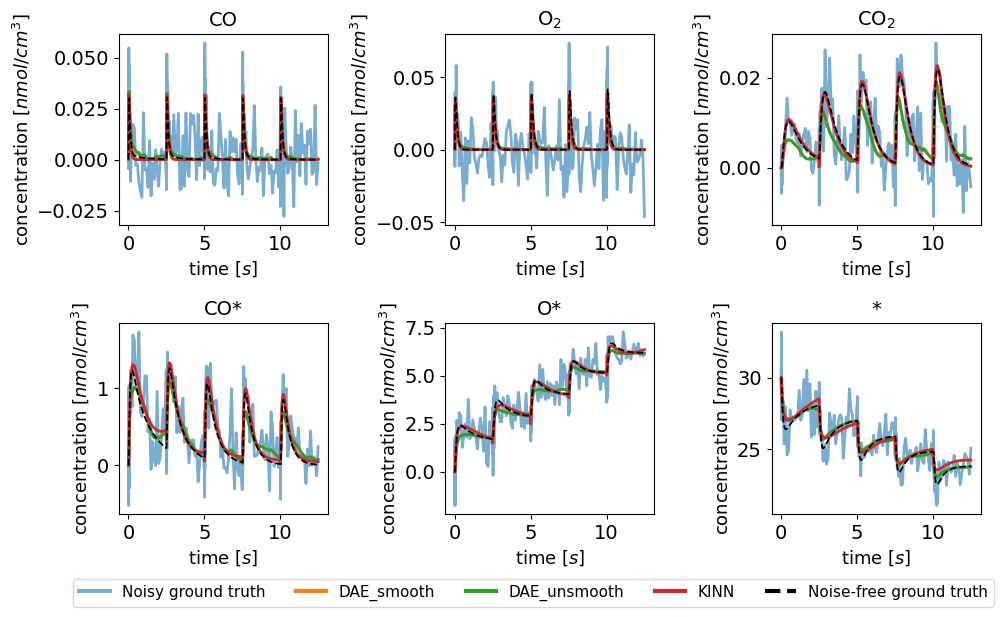

In [60]:
species_name = ['CO','O$_2$','CO$_2$','CO*','O*','*']
true_key = list(thin_data.keys())[1:]

# Create a list for real concentration time index
t_true = []
# Initialize the running sum
running_sum = 0
# Iterate over the keys from '0' to '4'
for key in map(str, range(n_pulse)):
    # Get the current list from the dictionary
    current_list = thin_data['time'][key][5:12491]    
    # Add the running sum to each element in the current list
    updated_list = [x + running_sum for x in current_list]    
    # Append the updated list to the result list
    t_true.extend(updated_list)    
    # Update the running sum for the next iteration
    running_sum += current_list[-1]
    
    
    
fig, axs = plt.subplots(2, 3, figsize = (10,6))

for i in range(6):
    axs[i//3,i%3].plot(dae_10_raw.index[:], dae_10_raw.iloc[:,i], 
                          linewidth = 2, alpha = 0.6)
    axs[i//3,i%3].plot(dae_10_raw.index[:], dae_10_smooth.iloc[:,i], 
                         linewidth = 2)
    axs[i//3,i%3].plot(dae_10_raw.index[:], dae_10_unsmooth.iloc[:,i], 
                           linewidth = 2)
    axs[i//3,i%3].plot(dae_10_raw.index[:], kinn_10_conc.iloc[0:,i], 
                          linewidth = 2)
    axs[i//3,i%3].plot(result, sum(thin_data[true_key[i]].values(), [])[5:len(result)+5],'k--',
                          linewidth = 1.3)
    axs[i//3,i%3].set_ylabel('concentration [$nmol/cm^3$]', fontsize = 13)
    axs[i//3,i%3].set_xlabel('time [$s$]', fontsize = 13)
    axs[i//3,i%3].set_title(species_name[i])

leg = fig.legend(['Noisy ground truth', 'DAE_smooth', 'DAE_unsmooth', 'KINN', 'Noise-free ground truth'],
                 ncol = 5, frameon = True, fontsize = 11, bbox_to_anchor=(1, 0.03))
for line in leg.get_lines():
    line.set_linewidth(3.0)

fig.tight_layout()